1. Importing All Libraries

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.utils import check_random_state
from sklearn.tree import DecisionTreeClassifier
import numpy as np
from sklearn.model_selection import ParameterGrid
from sklearn.svm import SVR
import pandas as pd
from sklearn.dummy import DummyRegressor
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import export_graphviz
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LinearRegression
from six import StringIO  
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import BaggingRegressor
from scipy.stats import randint as sp_randint
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor
from IPython.display import Image  
import pydotplus
import graphviz
from math import sqrt
from sklearn.model_selection import cross_val_score
%matplotlib inline

from sklearn.feature_extraction.text import CountVectorizer  #DT does not take strings as input for the model fit step....

2. Read CSV file

In [2]:
concrete_df = pd.read_csv("/content/sample_data/concrete.csv")
concrete_df

cement   slag    ash  water  ...  coarseagg  fineagg  age  strength
0      141.3  212.0    0.0  203.5  ...      971.8    748.5   28     29.89
1      168.9   42.2  124.3  158.3  ...     1080.8    796.2   14     23.51
2      250.0    0.0   95.7  187.4  ...      956.9    861.2   28     29.22
3      266.0  114.0    0.0  228.0  ...      932.0    670.0   28     45.85
4      154.8  183.4    0.0  193.3  ...     1047.4    696.7   28     18.29
...      ...    ...    ...    ...  ...        ...      ...  ...       ...
1025   135.0    0.0  166.0  180.0  ...      961.0    805.0   28     13.29
1026   531.3    0.0    0.0  141.8  ...      852.1    893.7    3     41.30
1027   276.4  116.0   90.3  179.6  ...      870.1    768.3   28     44.28
1028   342.0   38.0    0.0  228.0  ...      932.0    670.0  270     55.06
1029   540.0    0.0    0.0  173.0  ...     1125.0    613.0    7     52.61

[1030 rows x 9 columns]

3. Read into vars for splitting

In [3]:
X = concrete_df.drop(['strength'],axis=1)
y = concrete_df['strength']
print(X.shape)
print(y.shape)
print(concrete_df.info())
print(X)
print(y)

(1030, 8)
(1030,)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB
None
      cement   slag    ash  water  superplastic  coarseagg  fineagg  age
0      141.3  212.0    0.0  203.5           0.0      971.8    748.5   28
1      168.9   42.2  124.3  158.3          10.8     1080.8    796.2   14
2      250.0    0.0   95.7  187.4           5.5      956.9    861.2   28
3      266.0  114.0    0.0  228.0           0.0      93

**3. Find any missing values in dataframe**

In [41]:
concrete_df.isna().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

**4. Find Correaltion between each variable**

In [42]:
cor = concrete_df.corr()
cor

cement      slag       ash  ...   fineagg       age  strength
cement        1.000000 -0.275216 -0.397467  ... -0.222718  0.081946  0.497832
slag         -0.275216  1.000000 -0.323580  ... -0.281603 -0.044246  0.134829
ash          -0.397467 -0.323580  1.000000  ...  0.079108 -0.154371 -0.105755
water        -0.081587  0.107252 -0.256984  ... -0.450661  0.277618 -0.289633
superplastic  0.092386  0.043270  0.377503  ...  0.222691 -0.192700  0.366079
coarseagg    -0.109349 -0.283999 -0.009961  ... -0.178481 -0.003016 -0.164935
fineagg      -0.222718 -0.281603  0.079108  ...  1.000000 -0.156095 -0.167241
age           0.081946 -0.044246 -0.154371  ... -0.156095  1.000000  0.328873
strength      0.497832  0.134829 -0.105755  ... -0.167241  0.328873  1.000000

[9 rows x 9 columns]

**5. Describe Characteristics of each variable**

In [43]:
concrete_df.describe

<bound method NDFrame.describe of       cement   slag    ash  water  ...  coarseagg  fineagg  age  strength
0      141.3  212.0    0.0  203.5  ...      971.8    748.5   28     29.89
1      168.9   42.2  124.3  158.3  ...     1080.8    796.2   14     23.51
2      250.0    0.0   95.7  187.4  ...      956.9    861.2   28     29.22
3      266.0  114.0    0.0  228.0  ...      932.0    670.0   28     45.85
4      154.8  183.4    0.0  193.3  ...     1047.4    696.7   28     18.29
...      ...    ...    ...    ...  ...        ...      ...  ...       ...
1025   135.0    0.0  166.0  180.0  ...      961.0    805.0   28     13.29
1026   531.3    0.0    0.0  141.8  ...      852.1    893.7    3     41.30
1027   276.4  116.0   90.3  179.6  ...      870.1    768.3   28     44.28
1028   342.0   38.0    0.0  228.0  ...      932.0    670.0  270     55.06
1029   540.0    0.0    0.0  173.0  ...     1125.0    613.0    7     52.61

[1030 rows x 9 columns]>

**6.Info about each variable in DF**

In [44]:
concrete_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


**7. Find count of any missing values**

In [45]:
concrete_df.isnull().count()

cement          1030
slag            1030
ash             1030
water           1030
superplastic    1030
coarseagg       1030
fineagg         1030
age             1030
strength        1030
dtype: int64

**8. Print out names of all the columns in dataframe**

In [46]:
concrete_df.columns

Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age', 'strength'],
      dtype='object')

**9. Print all stats/metrics of each columns**

In [47]:
concrete_df.describe().transpose()

count        mean         std  ...      50%       75%     max
cement        1030.0  281.167864  104.506364  ...  272.900   350.000   540.0
slag          1030.0   73.895825   86.279342  ...   22.000   142.950   359.4
ash           1030.0   54.188350   63.997004  ...    0.000   118.300   200.1
water         1030.0  181.567282   21.354219  ...  185.000   192.000   247.0
superplastic  1030.0    6.204660    5.973841  ...    6.400    10.200    32.2
coarseagg     1030.0  972.918932   77.753954  ...  968.000  1029.400  1145.0
fineagg       1030.0  773.580485   80.175980  ...  779.500   824.000   992.6
age           1030.0   45.662136   63.169912  ...   28.000    56.000   365.0
strength      1030.0   35.817961   16.705742  ...   34.445    46.135    82.6

[9 rows x 8 columns]

**10. Print Skew of each variable**

In [48]:
concrete_df.skew().sort_values(ascending=False)

age             3.269177
superplastic    0.907203
slag            0.800717
ash             0.537354
cement          0.509481
strength        0.416977
water           0.074628
coarseagg      -0.040220
fineagg        -0.253010
dtype: float64

**11. Print unbiased Kurtosis**

In [49]:
concrete_df.kurt().sort_values(ascending=False)

age             12.168989
superplastic     1.411269
water            0.122082
fineagg         -0.102177
strength        -0.313725
slag            -0.508175
cement          -0.520652
coarseagg       -0.599016
ash             -1.328746
dtype: float64

**12. Print all correlation which have a considerable significant impact on each other**

In [52]:
df = concrete_df.corr()
df.columns
df[((df > 0.3) & (df < 1))| (df < -0.3)].dropna(how='all')


cement     slag       ash  ...   fineagg       age  strength
cement             NaN      NaN -0.397467  ...       NaN       NaN  0.497832
slag               NaN      NaN -0.323580  ...       NaN       NaN       NaN
ash          -0.397467 -0.32358       NaN  ...       NaN       NaN       NaN
water              NaN      NaN       NaN  ... -0.450661       NaN       NaN
superplastic       NaN      NaN  0.377503  ...       NaN       NaN  0.366079
fineagg            NaN      NaN       NaN  ...       NaN       NaN       NaN
age                NaN      NaN       NaN  ...       NaN       NaN  0.328873
strength      0.497832      NaN       NaN  ...       NaN  0.328873       NaN

[8 rows x 9 columns]

**13. Beginning of Univariate analysis.**

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


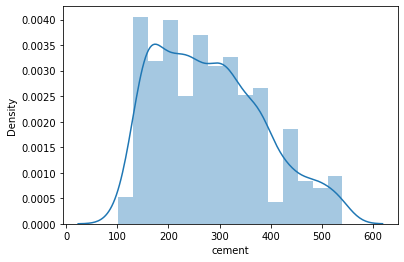

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


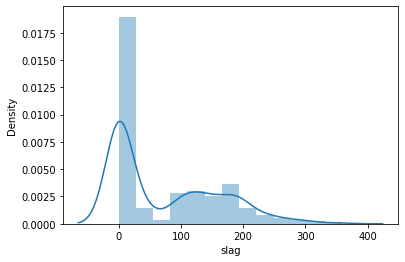

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


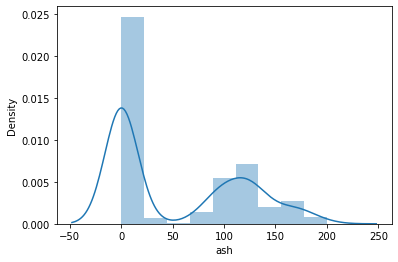

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


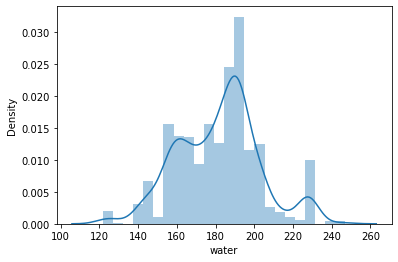

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


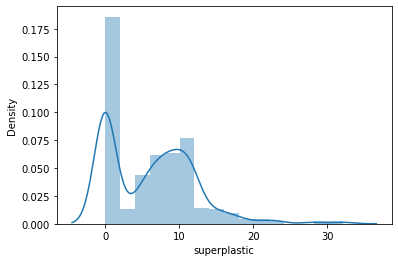

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


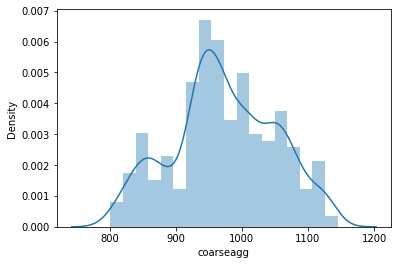

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


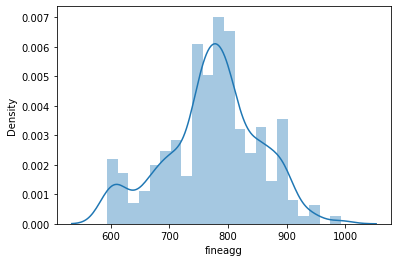

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


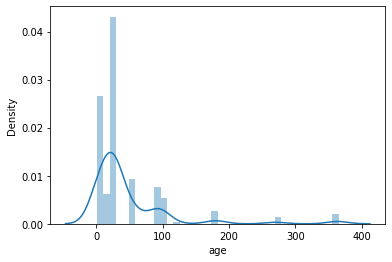

In [53]:
# the for loop here prints out the distplots for each of the column to help in univariate analysis
for i in ['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age']:
       sns.distplot(concrete_df[i])
       plt.show()

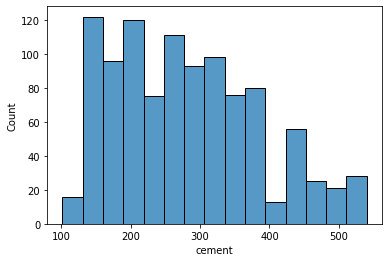

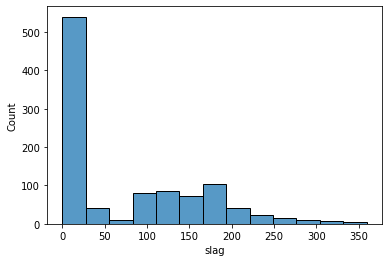

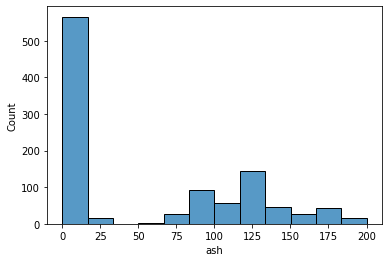

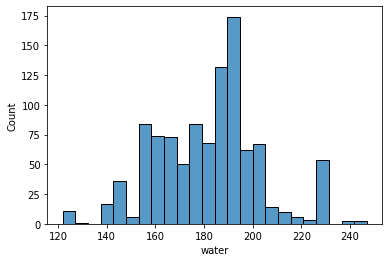

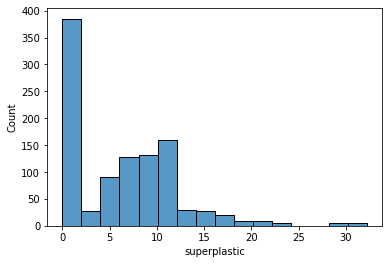

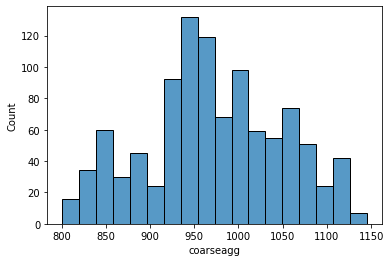

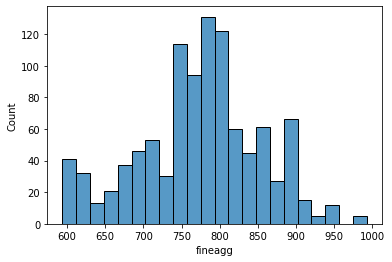

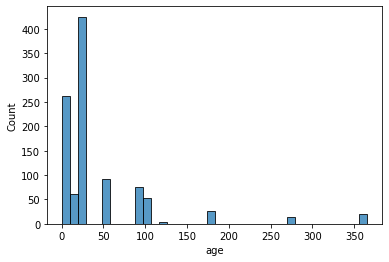

In [58]:
for i in ['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age']:
       sns.histplot(concrete_df[i])
       plt.show()

**14.Beginning of Bivariate Analysis**

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping

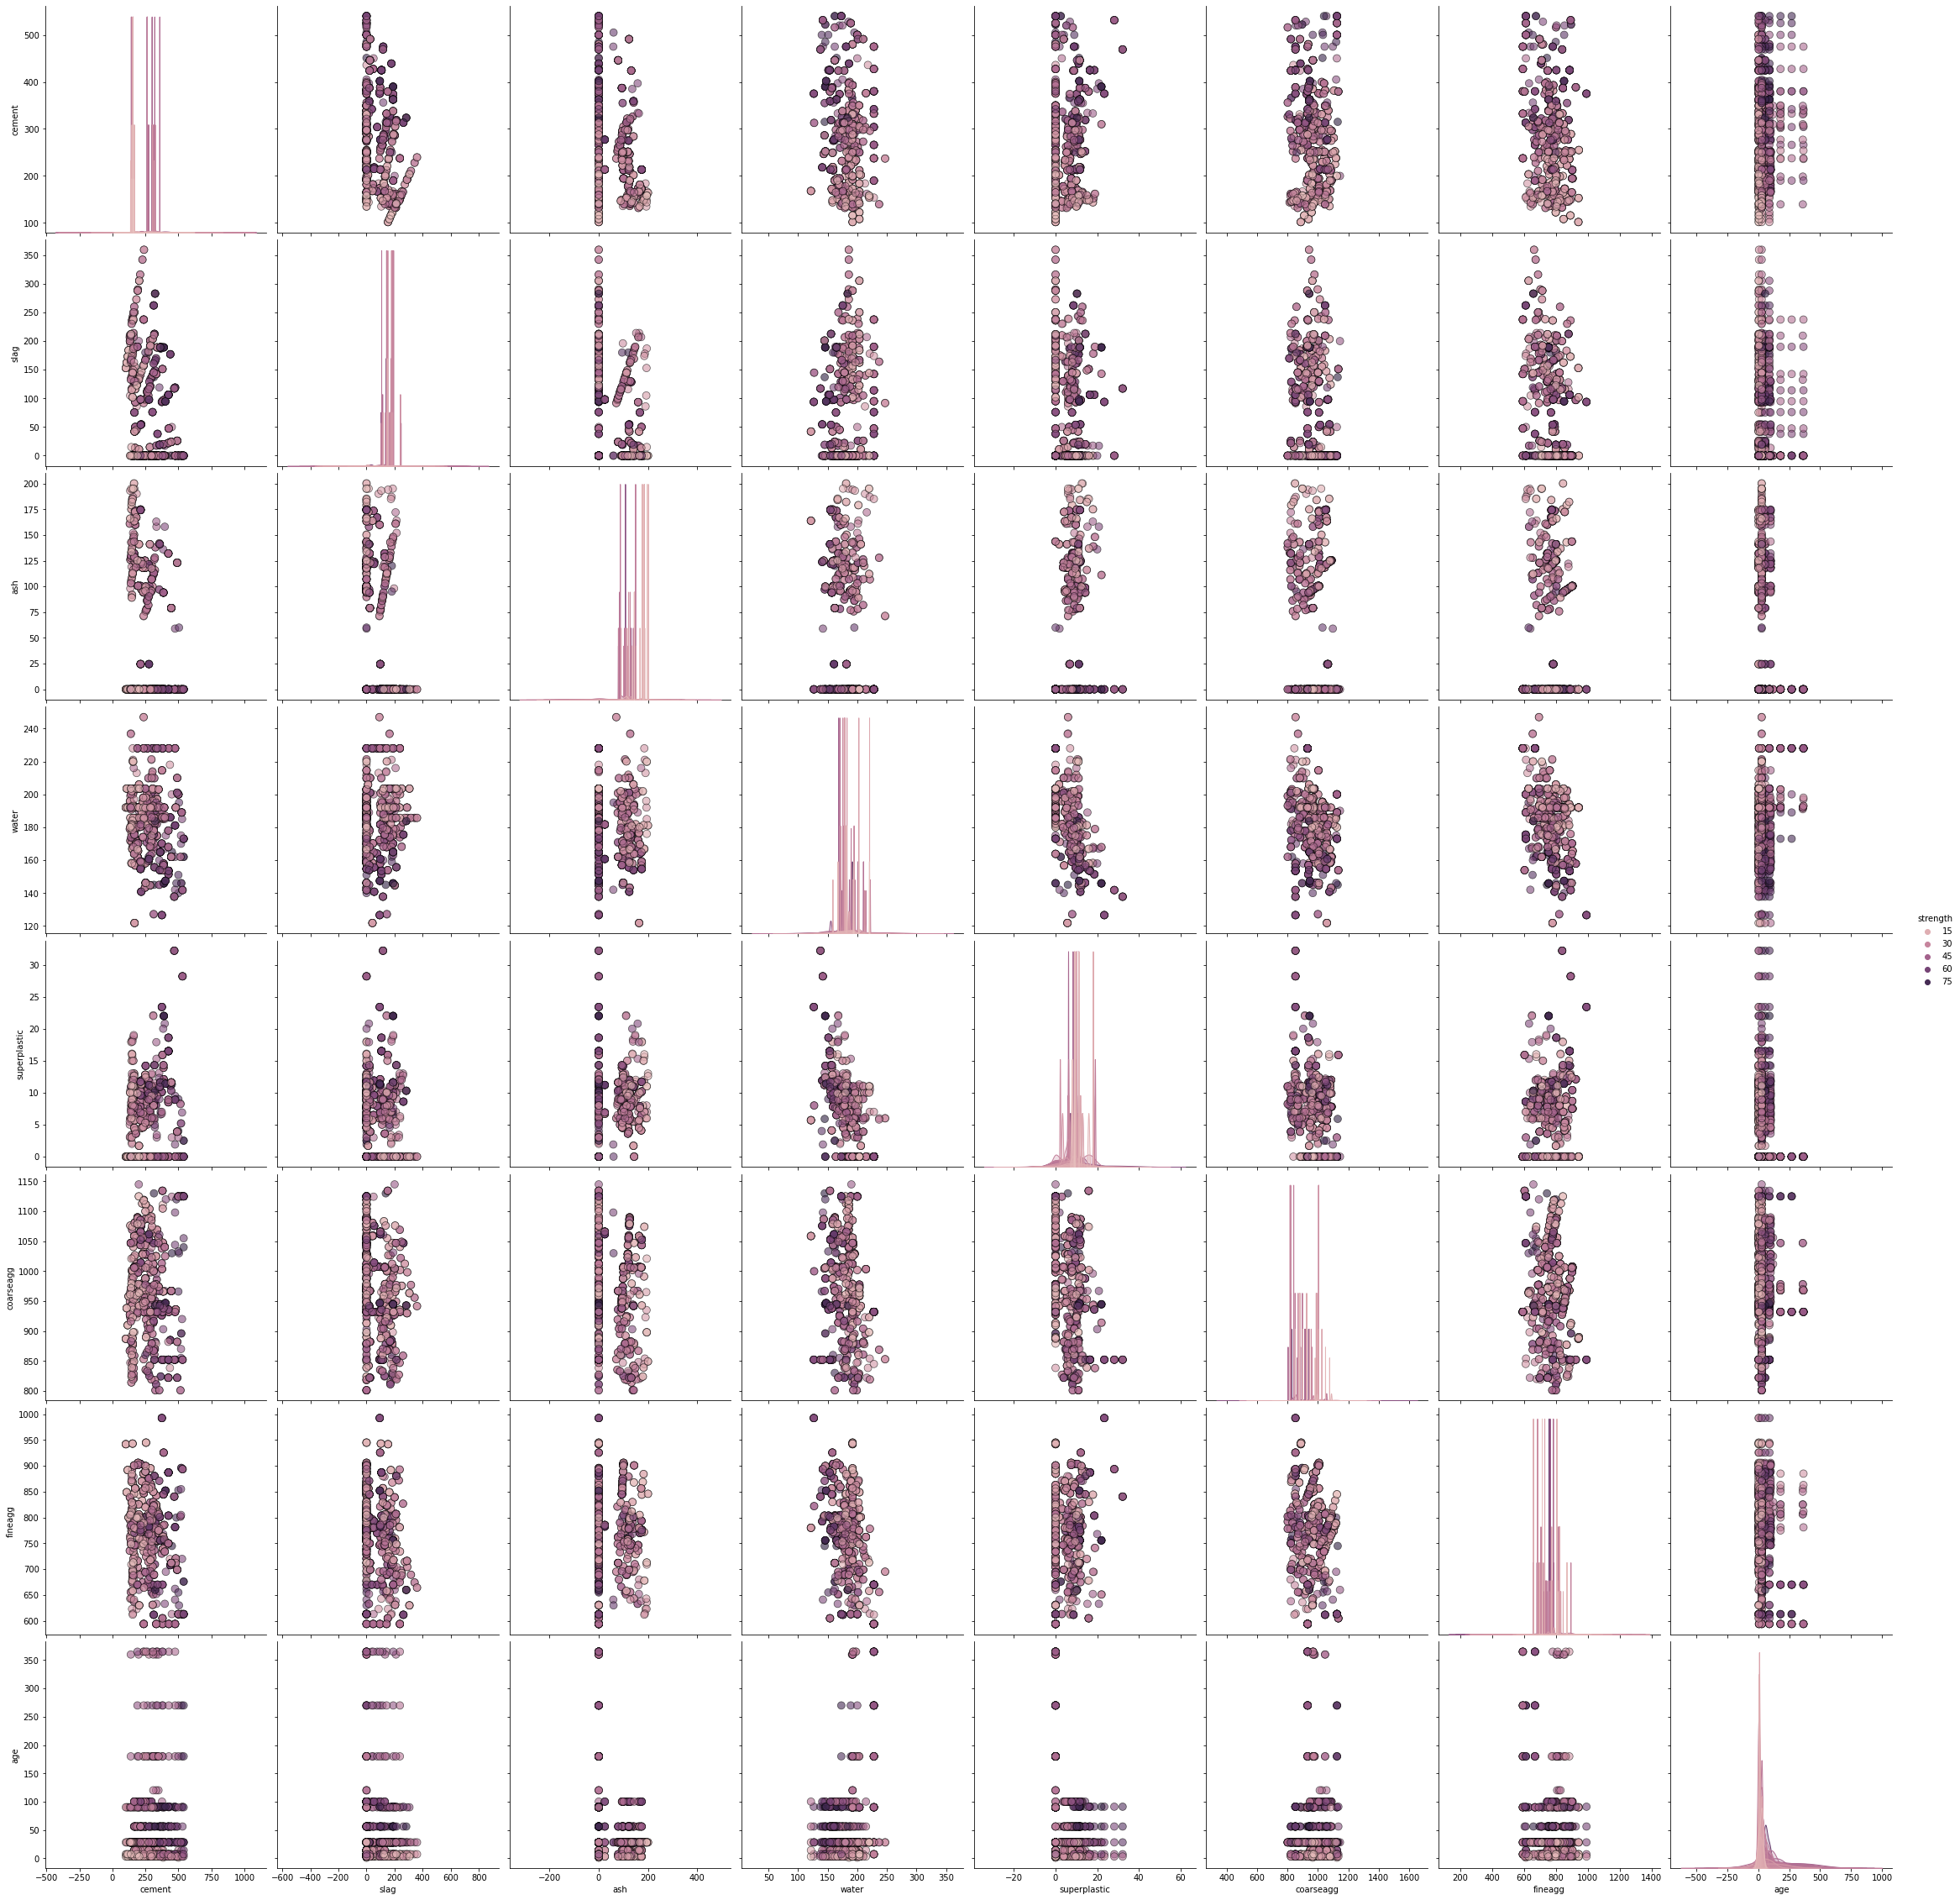

In [54]:
# Use pair plots on only variables with interesting correlations only

sns.pairplot(concrete_df,hue='strength',diag_kind ='kde',plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             size = 4,vars = ['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg', 'fineagg', 'age']) 

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1150: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


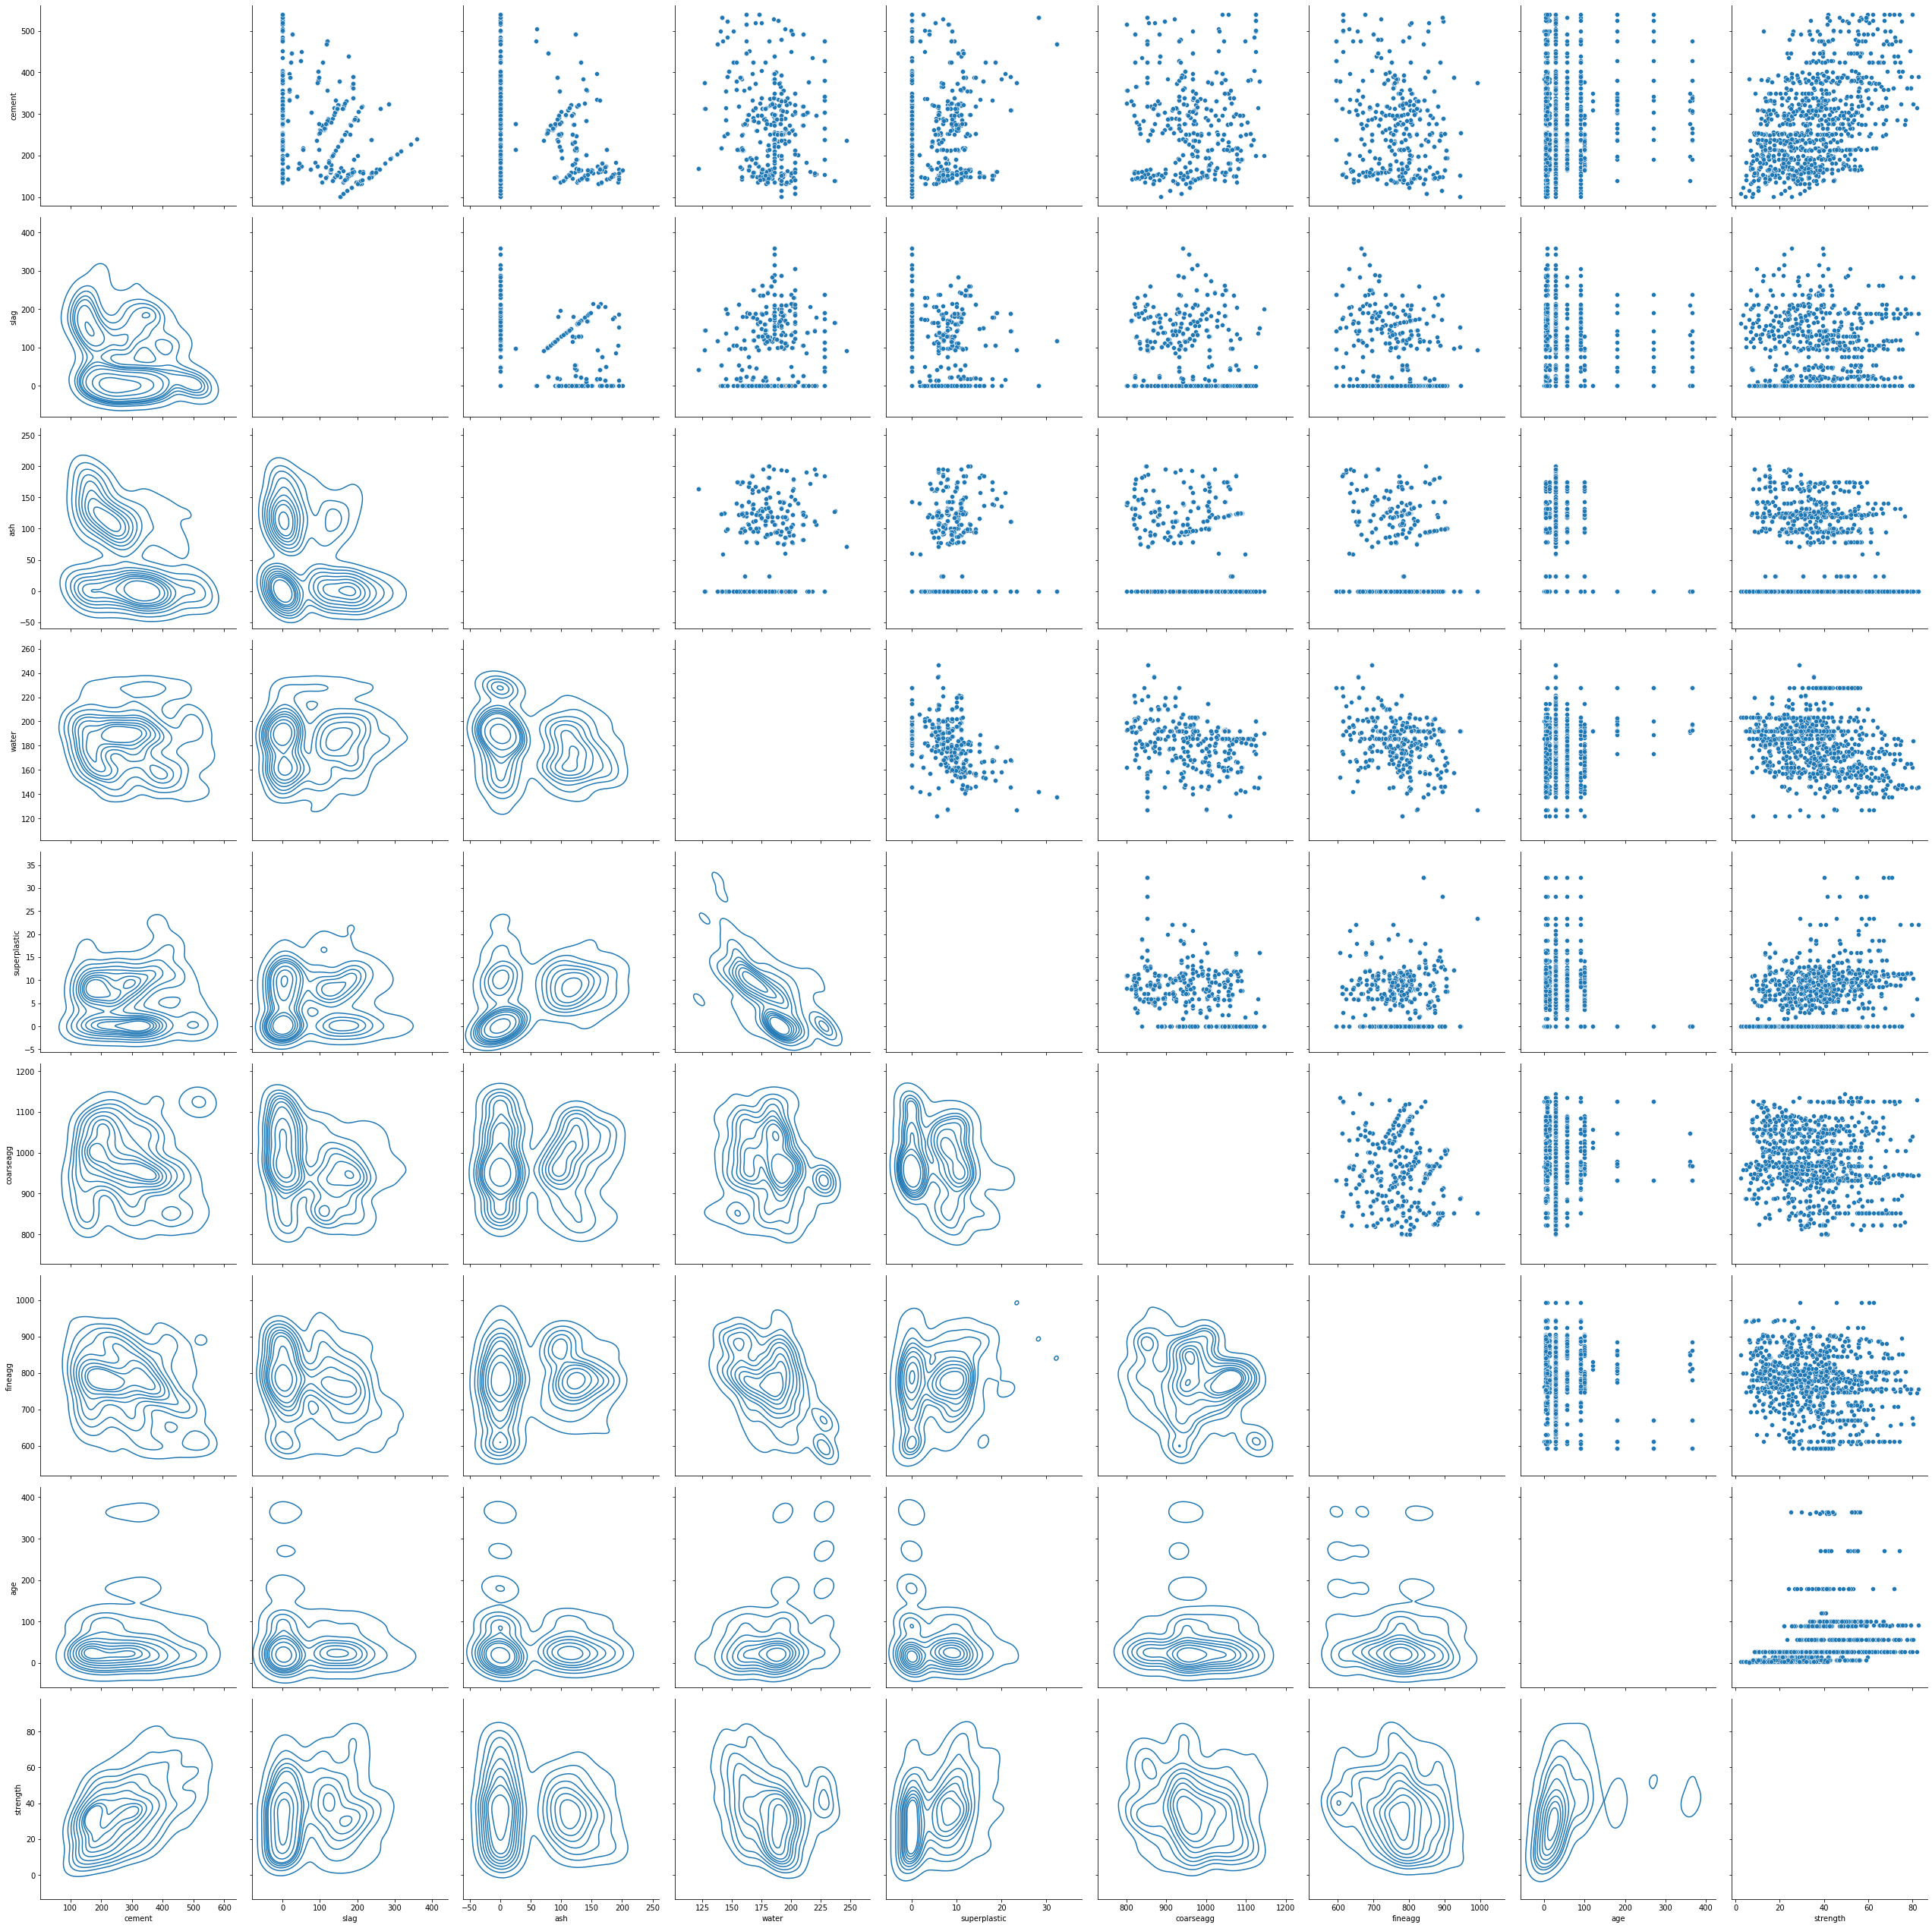

In [55]:
# Another way of visualizing pair plots for reference
grid = sns.PairGrid(data= concrete_df,
                    vars = ['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg', 'fineagg', 'age','strength'], size = 4)
grid = grid.map_upper(sns.scatterplot)
grid = grid.map_diag(plt.hist, bins = 10, color = 'darkred', edgecolor = 'k')
grid = grid.map_lower(sns.kdeplot)

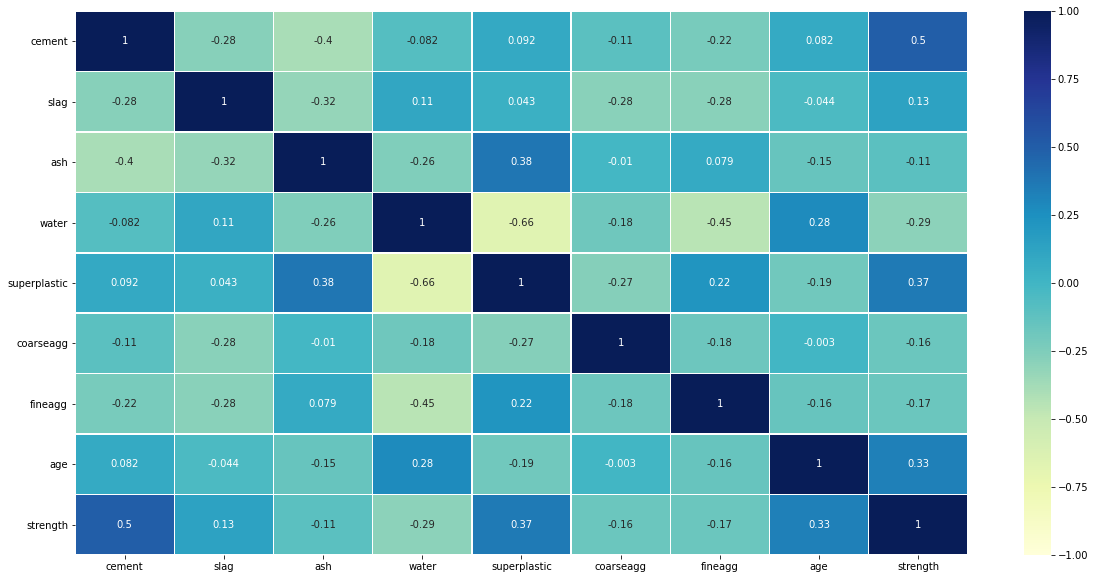

In [56]:
# this prints out the heatmap of the correlations for each of the column to help in bivariate analysis
# From the heatmap we can see pdays, previous and poutcome have high correlation with each other.

# Even then this is plays a very mild impact on 'Target'. So we can conclude from this that only 

plt.figure(figsize=(20,10))
sns.heatmap(concrete_df.corr(),annot=True,linewidths=.5,center=0,cbar=True,cmap="YlGnBu",vmin=-1,vmax=+1)
plt.show()

**15. Binning and Labeling edges for the better visualizations.**

In [59]:
bin_edges = [0,10,20,30,40,50,60,70,80,90]         # edges to define intervals
bin_labels = ['0-10', '11-20', '21-30','31-40', '41-50', '51-60','61-70','71-80', '81-90']             
# labels to denote each interval
concrete_df['strength'] = pd.cut(concrete_df.strength, bins=bin_edges , labels=bin_labels)
# pd.cut is used to divide the continous column in different groups as per bin egges and named according to bin label.
concrete_df

cement   slag    ash  water  ...  coarseagg  fineagg  age  strength
0      141.3  212.0    0.0  203.5  ...      971.8    748.5   28     21-30
1      168.9   42.2  124.3  158.3  ...     1080.8    796.2   14     21-30
2      250.0    0.0   95.7  187.4  ...      956.9    861.2   28     21-30
3      266.0  114.0    0.0  228.0  ...      932.0    670.0   28     41-50
4      154.8  183.4    0.0  193.3  ...     1047.4    696.7   28     11-20
...      ...    ...    ...    ...  ...        ...      ...  ...       ...
1025   135.0    0.0  166.0  180.0  ...      961.0    805.0   28     11-20
1026   531.3    0.0    0.0  141.8  ...      852.1    893.7    3     41-50
1027   276.4  116.0   90.3  179.6  ...      870.1    768.3   28     41-50
1028   342.0   38.0    0.0  228.0  ...      932.0    670.0  270     51-60
1029   540.0    0.0    0.0  173.0  ...     1125.0    613.0    7     51-60

[1030 rows x 9 columns]

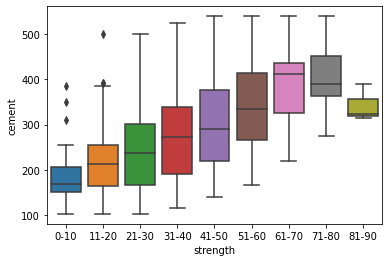

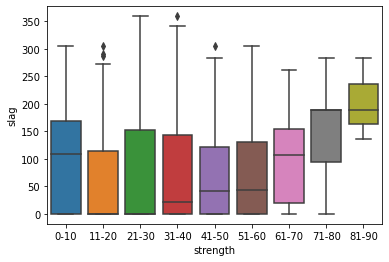

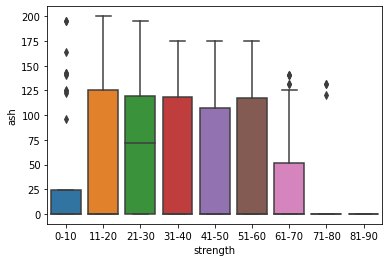

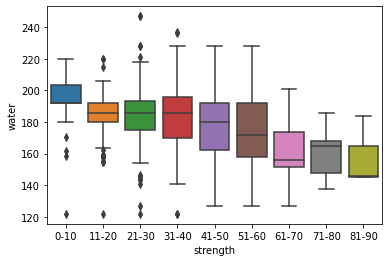

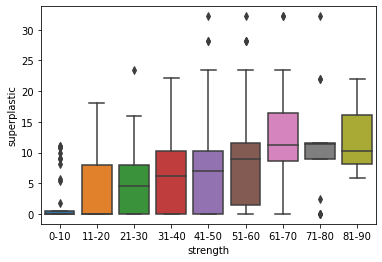

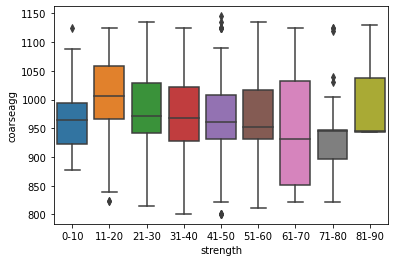

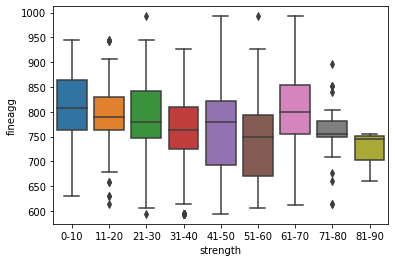

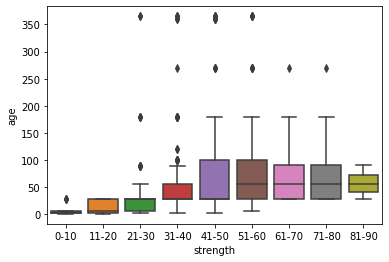

In [60]:
# the for loop here prints out the boxplots for each of the column to help in univariate analysis
for i in ['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg','fineagg', 'age']:
       sns.boxplot(x='strength',y=i,data=concrete_df)
       plt.show()

In [61]:
#Split the dataset into train set test set also the validation
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=1)
#X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

regression_model = LinearRegression()
regression_model.fit(X_train,y_train)
X_train

cement   slag    ash  water  superplastic  coarseagg  fineagg  age
185   350.0    0.0    0.0  203.0           0.0      974.0    775.0   14
286   374.0  189.2    0.0  170.1          10.1      926.1    756.7   91
600   277.0    0.0    0.0  191.0           0.0      968.0    856.0    3
691   380.0   95.0    0.0  228.0           0.0      932.0    594.0    7
474   356.0    0.0  142.0  193.0          11.0      801.0    778.0   28
..      ...    ...    ...    ...           ...        ...      ...  ...
960   251.8    0.0   99.9  146.1          12.4     1006.0    899.8    3
847   165.0    0.0  143.6  163.8           0.0     1005.6    900.9    3
715   303.6  139.9    0.0  213.5           6.2      895.5    722.5   28
905   318.0    0.0  126.0  210.0           6.0      861.0    737.0   28
235   236.0    0.0    0.0  194.0           0.0      968.0    885.0    3

[721 rows x 8 columns]

In [62]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[idx]))

The coefficient for cement is 0.12655755592921453
The coefficient for slag is 0.10882841423627024
The coefficient for ash is 0.09070514083244802
The coefficient for water is -0.10315724008089977
The coefficient for superplastic is 0.37612343073244114
The coefficient for coarseagg is 0.024028594961397136
The coefficient for fineagg is 0.036192894560112286
The coefficient for age is 0.11043496734221796


In [63]:
regression_model.score(X_train,y_train)

0.6031487540630229

In [64]:
regression_model.score(X_test,y_test)

0.6339136715208276

In [65]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

poly = PolynomialFeatures(degree=2, interaction_only=True)
X_train2 = poly.fit_transform(X_train)
X_test2 = poly.fit_transform(X_test)

poly_clf = linear_model.LinearRegression()

poly_clf.fit(X_train2, y_train)

y_pred = poly_clf.predict(X_test2)

#print(y_pred)

#In sample (training) R^2 will always improve with the number of variables!
print(poly_clf.score(X_train2, y_train))

0.7549578268848264


In [66]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

poly = PolynomialFeatures(degree=4, interaction_only=True)
X_train3 = poly.fit_transform(X_train)
X_test3 = poly.fit_transform(X_test)

poly_clf = linear_model.LinearRegression()

poly_clf.fit(X_train3, y_train)

y_pred = poly_clf.predict(X_test3)

#print(y_pred)

#In sample (training) R^2 will always improve with the number of variables!
print(poly_clf.score(X_train3, y_train))

0.8535208403345766


In [67]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

poly = PolynomialFeatures(degree=6, interaction_only=True)
X_train4 = poly.fit_transform(X_train)
X_test4 = poly.fit_transform(X_test)

poly_clf = linear_model.LinearRegression()

poly_clf.fit(X_train4, y_train)

y_pred = poly_clf.predict(X_test4)

#print(y_pred)

#In sample (training) R^2 will always improve with the number of variables!
print(poly_clf.score(X_train4, y_train))

0.8618818869275249


# Part 2

4. Splitting Train and Test and Cross Validation into 60:20:20 ratio

In [4]:
from sklearn.model_selection import train_test_split 

X_Train, X_test, Y_Train, y_test = train_test_split(X,y, random_state = 1,test_size=0.2,train_size=0.8)
X_train, x_cv, y_train, y_cv = train_test_split(X_Train,Y_Train,test_size = 0.25,train_size =0.75,random_state=1)


5. Building Model for DT including all features with K-Fold Cross Validation ( CV ) 

In [5]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
dt = DecisionTreeRegressor()

dt.fit(X_train, y_train)

pred1 = dt.predict(x_cv)  # Predictions from logistic regression
score1 = dt.score(x_cv, y_cv)
print(score1)

kf1 =  cross_val_score(dt, x_cv, y_cv, cv = 5).mean()
print(kf1)

dtmse = mean_squared_error(pred1,y_cv)
print(dtmse)

0.8518703885831054
0.5639506231053608
45.75918762135921


6. Building Model for RF including all features with K-Fold Cross Validation ( CV ) 

In [6]:
#Including all features
from sklearn.ensemble import RandomForestRegressor

rf1 = RandomForestRegressor()

rf1.fit(X_train, y_train)
pred1rf = rf1.predict(x_cv)
score3 = rf1.score(x_cv, y_cv)
print(score3)

kf2 =  cross_val_score(rf1, x_cv, y_cv, cv = 5).mean()
print(kf2)

pred1rfmse = mean_squared_error(pred1rf,y_cv)
print(pred1rfmse)

0.9055943530708866
0.779910180359029
29.163147523469394


7. Building Model for Ada Boost including all features with K-Fold Cross Validation ( CV ) 

In [7]:
from sklearn.ensemble import AdaBoostRegressor

adbr = AdaBoostRegressor(base_estimator=rf1)

adbr.fit(X_train,y_train)
predadbr = adbr.predict(x_cv)
score5 = adbr.score(x_cv,y_cv)
print(score5)

kf3 =  cross_val_score(adbr, x_cv, y_cv, cv = 5).mean()
print(kf3)

predadbrmse = mean_squared_error(predadbr,y_cv)
print(predadbrmse)

0.9099684959150989
0.8020766118598835
27.81191719770008


8. Building Model for Bagging Regressor including all features with K-Fold Cross Validation ( CV ) 

In [8]:
from sklearn.ensemble import BaggingRegressor

br1 = BaggingRegressor(base_estimator=rf1)

br1.fit(X_train,y_train)
predbr1 = br1.predict(x_cv)
score7 = br1.score(x_cv,y_cv)
print(score7)

kf7 =  cross_val_score(br1, x_cv, y_cv, cv = 5).mean()
print(kf7)

predbr1mse = mean_squared_error(predbr1,y_cv)
print(predbr1mse)

0.8927996879773722
0.7694256379213987
33.11558805825776


9. Creating feature importance set from dt 

In [9]:
pd.Series(dt.feature_importances_, X_train.columns ).sort_values(ascending= False)

cement          0.383665
age             0.304451
water           0.127209
slag            0.105536
fineagg         0.028624
superplastic    0.019900
coarseagg       0.018699
ash             0.011917
dtype: float64

In [10]:
feature_set = ['cement',           
'age',                        
'water',                          
'slag',                      
'fineagg',
'coarseagg'
]

In [11]:
X_Train, X_test, Y_Train, y_test = train_test_split(X.loc[:,feature_set],y, random_state = 1,test_size=0.2,train_size=0.8)
X_train, x_cv, y_train, y_cv = train_test_split(X_Train,Y_Train,test_size = 0.25,train_size =0.75,random_state=1)

10. Building Model for DT including features set with K-Fold Cross Validation ( CV ) 

In [12]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
dt2 = DecisionTreeRegressor()

dt2.fit(X_train, y_train)

pred2 = dt2.predict(x_cv)  # Predictions from logistic regression
score2 = dt2.score(x_cv, y_cv)
print(score2)

kf4 =  cross_val_score(dt2, x_cv, y_cv, cv = 5).mean()
print(kf4)

pred2mse = mean_squared_error(pred2,y_cv)
print(pred2mse)

0.8871661704808851
0.6122094298592187
34.855855798274


11. Building Model for RF including features set with K-Fold Cross Validation ( CV ) 

In [13]:
#Including feature_set
from sklearn.ensemble import RandomForestRegressor

rf2 = RandomForestRegressor()

rf2.fit(X_train, y_train)
pred2rf = rf2.predict(x_cv)
score4 = rf2.score(x_cv, y_cv)
print(score4)

kf5 =  cross_val_score(rf2, x_cv, y_cv, cv = 5).mean()
print(kf5)

pred2rfmse = mean_squared_error(pred2rf,y_cv)
print(pred2rfmse)

0.8985707514736628
0.7829047955899229
31.33283054761848


12. Building Model for Ada Boost including features set with K-Fold Cross Validation ( CV ) 

In [14]:
from sklearn.ensemble import AdaBoostRegressor

adbr2 = AdaBoostRegressor(base_estimator=rf2)

adbr2.fit(X_train,y_train)
predadbr2 = adbr2.predict(x_cv)
score6 = adbr2.score(x_cv,y_cv)
print(score6)

kf6 =  cross_val_score(adbr2, x_cv, y_cv, cv = 5).mean()
print(kf6)

predadbr2mse = mean_squared_error(predadbr2,y_cv)
print(predadbr2mse)

0.9008609841610992
0.7959136241105609
30.62534751138734


13.Building Model for Bagging Regressor including features set with K-Fold Cross Validation ( CV ) 

In [15]:
from sklearn.ensemble import BaggingRegressor

br2 = BaggingRegressor(base_estimator=rf2)

br2.fit(X_train,y_train)
predbr2 = br2.predict(x_cv)
score8 = br2.score(x_cv,y_cv)
print(score8)

kf8 =  cross_val_score(br2, x_cv, y_cv, cv = 5).mean()
print(kf8)

predbr2mse = mean_squared_error(predbr2,y_cv)
print(predbr2mse)

0.8858266469160585
0.7742965726859672
35.269652267054454


From the above models we can see that having all feature has improved the model prediction for Random Forest(RF) and Ada Boost Regressor(ADBR) has improved score. Hence choosing RF and ADBR for further tuning. Using Random Search CV. Polynomial feature will also be tested during tuning.

Random Forest Model Tuning 

In [16]:
from sklearn.ensemble import RandomForestRegressor

rfModel = RandomForestRegressor()

rfModel.fit(X_train, y_train)
pred3rfModel = rfModel.predict(x_cv)
score9 = rfModel.score(x_cv, y_cv)
print(score9)

kf9 =  cross_val_score(rfModel, x_cv, y_cv, cv = 5).mean()
print(kf9)

pred3rfmodelmse = mean_squared_error(pred3rfModel,y_cv)
print(pred3rfmodelmse)

0.8975221667001724
0.7810202680128929
31.65675219250834


In [17]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

In [18]:
param_dist = {"max_depth": sp_randint(10, 100),
              "max_features": ['auto', 'sqrt'],
              "min_samples_leaf": sp_randint(1, 20),
              "bootstrap": [True, False],
              "n_estimators": sp_randint(50, 150)
             }

In [19]:
samples = 50
rlModelTuned = RandomizedSearchCV(rfModel, param_distributions=param_dist, cv = 5, n_iter=samples, verbose = 2, n_jobs= 4,random_state=1)
rlModelTuned.fit(x_cv, y_cv)

rlModelTuned.best_params_

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    5.9s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:   18.4s
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:   28.5s finished


{'bootstrap': True,
 'max_depth': 20,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'n_estimators': 132}

In [20]:
rfFinalRCV = RandomForestRegressor(bootstrap=True,max_depth=20,
max_features='auto',min_samples_leaf= 1,n_estimators=132)

rfFinalRCV.fit(X_train, y_train)
pred4rfFinalRCV = rfFinalRCV.predict(x_cv)

score10 = rfFinalRCV.score(x_cv, y_cv)
print(score10)

kf10 =  cross_val_score(rfFinalRCV, x_cv, y_cv, cv = 5).mean()
print(kf10)

pred4rfFinalRCVmse = mean_squared_error(pred4rfFinalRCV,y_cv)
print(pred4rfFinalRCVmse)

0.901492901876992
0.7911978692877046
30.430139807497376


Ada Boost Model Tuning

In [22]:
from sklearn.ensemble import AdaBoostRegressor

adbrModel = AdaBoostRegressor(base_estimator=rf1)

adbrModel.fit(X_train,y_train)
predadbrModel = adbrModel.predict(x_cv)
score11 = adbrModel.score(x_cv,y_cv)
print(score11)

kf11 =  cross_val_score(adbrModel, x_cv, y_cv, cv = 5).mean()
print(kf11)

preadbrModelmse = mean_squared_error(predadbrModel,y_cv)
print(preadbrModelmse)

0.9019454210065598
0.7957703937795995
30.2903506893455


In [23]:
param_dist_ada = {
 'n_estimators': [50, 100],
 'learning_rate' : [0.01,0.05,0.1,0.3,1],
 'loss' : ['linear', 'square', 'exponential']
 }

In [24]:
samples = 50
adbrModelTuned = RandomizedSearchCV(AdaBoostRegressor(), param_distributions=param_dist_ada, cv = 5, n_iter=samples, verbose = 2, n_jobs= 4,random_state=1)
adbrModelTuned.fit(x_cv, y_cv)

adbrModelTuned.best_params_

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 30 is smaller than n_iter=50. Running 30 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=4)]: Done  58 tasks      | elapsed:    5.4s
[Parallel(n_jobs=4)]: Done 143 out of 150 | elapsed:   13.0s remaining:    0.6s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:   13.6s finished


{'learning_rate': 1, 'loss': 'linear', 'n_estimators': 100}

In [25]:
#{'learning_rate': 1, 'loss': 'square', 'n_estimators': 100}

adbrFinalRCV = AdaBoostRegressor(base_estimator=rf1,learning_rate=1,loss='square',n_estimators=100)

adbrFinalRCV.fit(X_train, y_train)
adbrFinalRCVpred = adbrFinalRCV.predict(x_cv)

score12 = adbrFinalRCV.score(x_cv, y_cv)
print(score12)

kf12 =  cross_val_score(adbrFinalRCV, x_cv, y_cv, cv = 5).mean()
print(kf12)

adbrFinalRCVpredfmse = mean_squared_error(adbrFinalRCVpred,y_cv)
print(adbrFinalRCVpredfmse)

0.9007160619162852
0.7921117054070949
30.670115901228634


Trial Code For PipeLine begins here

In [27]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import PolynomialFeatures

In [ ]:
concrete_df.columns

Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age', 'strength'],
      dtype='object')

In [ ]:

steps = [
         ('scalar',StandardScaler()),
         ('poly',PolynomialFeatures(degree=2)),
         ('model',Lasso())
]


In [ ]:
ridgepipe = Pipeline(steps)
 

In [ ]:
parameters_pipe = [{'model__alpha':np.arange(0,0.5,0.01)}]

In [ ]:
from sklearn.metrics import make_scorer

In [ ]:
scoring = make_scorer(mean_squared_error)

In [ ]:
pipe_final = RandomizedSearchCV(estimator=ridgepipe,
                                param_distributions=parameters_pipe,
                                scoring=make_scorer(mean_squared_error),
                                cv=5,n_jobs=4,return_train_score=True)

In [ ]:
pipe_final.fit(X_train,y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=Pipeline(memory=None,
                                      steps=[('scalar',
                                              StandardScaler(copy=True,
                                                             with_mean=True,
                                                             with_std=True)),
                                             ('poly',
                                              PolynomialFeatures(degree=2,
                                                                 include_bias=True,
                                                                 interaction_only=False,
                                                                 order='C')),
                                             ('model',
                                              Lasso(alpha=1.0, copy_X=True,
                                                    fit_intercept=True,
                                         

In [ ]:
print(pipe_final.cv_results_)

{'mean_fit_time': array([0.01849427, 0.01109729, 0.01021991, 0.01412678, 0.01556907,
       0.01791916, 0.01676507, 0.01869974, 0.01487226, 0.01309719]), 'std_fit_time': array([0.00360986, 0.0040469 , 0.00217719, 0.00104736, 0.00232961,
       0.00583896, 0.00515964, 0.00558326, 0.00218266, 0.00551103]), 'mean_score_time': array([0.00613308, 0.00637665, 0.00630002, 0.00365624, 0.01017776,
       0.01112518, 0.00225735, 0.00996504, 0.00657239, 0.00255933]), 'std_score_time': array([3.39866057e-03, 2.23299945e-03, 2.68413915e-03, 2.89588506e-03,
       7.75109928e-03, 4.48734176e-03, 7.16845018e-05, 4.67664987e-03,
       5.60878877e-03, 7.55597139e-04]), 'param_model__alpha': masked_array(data=[0.47000000000000003, 0.15, 0.26, 0.46, 0.11, 0.37, 0.2,
                   0.06, 0.43, 0.07],
             mask=[False, False, False, False, False, False, False, False,
                   False, False],
       fill_value='?',
            dtype=object), 'params': [{'model__alpha': 0.47000000000000

In [ ]:
print(pipe_final.best_score_)

78.43878116458947


Trial Code for pipeline ends here

Building PipeLine for automation of random Forest Model 

In [28]:
clf = Pipeline(steps=[
         ('poly',PolynomialFeatures(degree=3)),
         ('regressor', RandomForestRegressor(bootstrap=True,max_depth=20,
            max_features='auto',min_samples_leaf= 1,n_estimators=132)) 
       ])
clf

Pipeline(memory=None,
         steps=[('poly',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('regressor',
                 RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                       criterion='mse', max_depth=20,
                                       max_features='auto', max_leaf_nodes=None,
                                       max_samples=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       n_estimators=132, n_jobs=None,
                                       oob_score=False, random_state=None,
                                       verbose=0, warm_start=False))],
         ver

In [29]:
clf.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('poly',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('regressor',
                 RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                       criterion='mse', max_depth=20,
                                       max_features='auto', max_leaf_nodes=None,
                                       max_samples=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       n_estimators=132, n_jobs=None,
                                       oob_score=False, random_state=None,
                                       verbose=0, warm_start=False))],
         ver

In [30]:
clfpred = clf.predict(X_test)

In [31]:
scorepolyclf = clf.score(X_test,y_test)
print(scorepolyclf)

0.9101539127679927


In [32]:
clf1 = Pipeline(steps=[
         ('poly',PolynomialFeatures(degree=3)),
         ('regressor',  AdaBoostRegressor(base_estimator=rf1,learning_rate=1,loss='linear',n_estimators=100)) 
       ])
clf1

Pipeline(memory=None,
         steps=[('poly',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('regressor',
                 AdaBoostRegressor(base_estimator=RandomForestRegressor(bootstrap=True,
                                                                        ccp_alpha=0.0,
                                                                        criterion='mse',
                                                                        max_depth=None,
                                                                        max_features='auto',
                                                                        max_leaf_nodes=None,
                                                                        max_samples=None,
                                                                        min_impurity_decrease=0.0,
                                                          

In [33]:
clf1.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('poly',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('regressor',
                 AdaBoostRegressor(base_estimator=RandomForestRegressor(bootstrap=True,
                                                                        ccp_alpha=0.0,
                                                                        criterion='mse',
                                                                        max_depth=None,
                                                                        max_features='auto',
                                                                        max_leaf_nodes=None,
                                                                        max_samples=None,
                                                                        min_impurity_decrease=0.0,
                                                          

In [34]:
clf1pred = clf1.predict(X_test)

In [35]:
scorepolyclf1 = clf1.score(X_test,y_test)
print(scorepolyclf1)


0.9036174970785649


Mean Squared Error Calculation

In [36]:
from sklearn.metrics import mean_squared_error
clfmse = mean_squared_error(clfpred,y_test)
clf1mse = mean_squared_error(clf1pred,y_test)
print(clfmse)
print(clf1mse)

26.456907125169096
28.381680347403357


Creating a Dataframe for all metrics

In [40]:
import pandas as pd

kf13 = None
kf14 = None

data = {'Name of Model':  ['Decision Tree with All features','Random Forest with All Features','Ada Boost with All features',
                           'Bagging Regressor with All features','Decision Tree with feature set','Random Forest with feature set',
                           'Ada Boost with feature set','Bagging Regressor with feature set','Random Forest after Tuning',
                           'Ada Boost after Tuning','Random Forest with Poly in Pipeline','Ada Boost with Poly in Pipeline'],
        'Score': [score1,score3,score5,score7,score2,score4,score6,score8,score10,score12,scorepolyclf,scorepolyclf1],
        'Cross Val Score':[kf1,kf2,kf3,kf7,kf4,kf5,kf6,kf8,kf10,kf12,kf13,kf14],
        'Mean Squared Error':[dtmse,pred1rfmse,predadbrmse,predbr1mse,pred2mse,pred2rfmse,predadbr2mse,predbr2mse,pred4rfFinalRCVmse,adbrFinalRCVpredfmse,clfmse,clf1mse]
         
        }

metricsdata = pd.DataFrame (data, columns = ['Name of Model','Score','Cross Val Score','Mean Squared Error'])
pd.reset_option("display.max_columns",None)
metricsdata

Name of Model  ...  Mean Squared Error
0       Decision Tree with All features  ...           45.759188
1       Random Forest with All Features  ...           29.163148
2           Ada Boost with All features  ...           27.811917
3   Bagging Regressor with All features  ...           33.115588
4        Decision Tree with feature set  ...           34.855856
5        Random Forest with feature set  ...           31.332831
6            Ada Boost with feature set  ...           30.625348
7    Bagging Regressor with feature set  ...           35.269652
8            Random Forest after Tuning  ...           30.430140
9                Ada Boost after Tuning  ...           30.670116
10  Random Forest with Poly in Pipeline  ...           26.456907
11      Ada Boost with Poly in Pipeline  ...           28.381680

[12 rows x 4 columns]

**CONCLUSION**

1. Choose appropriate Regression models for evaluating prediction of strength of cement. These models were Decision Tree Regressor, Random Forest Regressor, Ada Boost Regressor and Bagging Regressor.

2. These models were trained in 2 ways. The first way of training was done with all the features being included. The Second way of training was done with certain features which seemed to have higher impact than other features towards predicting strength.

It was found that all the models which included all the features for training had more impact on the prediction score.

3. Two models showed highest potential. These being Random Forest and Ada Boost.

4. These models were further tuned using Randomized Search CV.

5. All the models above have these metrics for evaluation - Mean Squared Error, prediction Score and Cross Val Score.

6. Random Forest Regressor and Ada Boost Regressor Both had very small differences in the prediction score. But there was a considerable difference in the MSE.

7. Ada Boost Regressor had a better MSE than Random Forest Regressor.

8. Pipeline automation was built for both Ada Boost Regressor and Random Forest Regressor.

9. In the pipeline, Polynomial feature to see whether it improved the score. There was a good improvement from order degree 2 than degree 3. 
( 

There was a requirement in the project description which mentioned that exploration of dataset to find new features from existing features. In the Concrete_df dataframe there was no such features which could be combined in a meaningful way to create a better variable than the existing variable to reduce the curse of dimensionality.

For the linear regression model higher degree better the socre. But too high a degree results in over fit 

) 

10. K - Fold Cross Validation has been done for all models. Ada Boost Pipeline and Random Forest Pipeline don't have a K-fold score because the K-fold score is already known for the models. Since this is a Pipeline shipment K - Fold Score wasn't applied since the model was tested on the Reserved 20% data ( Assumed to be Production Data ) 

11. The pipeline models was trained on the reserved test Data. ( X_test, Y_test ) from the 60 : 20 : 20 split.


